In [1]:
# mute irrelevant messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
# Define constants
# number of samples
sample_size= 2000
AB_steps = 30


lam = 0.1 # weight on mutual information 
mean_x = 0.0
sigma_x = 1.0


mean_nu = np.zeros(AB_steps+1)
sigma_nu = np.zeros(AB_steps+1)

mean_nu[0] = -0.8
sigma_nu[0] = np.sqrt(2.5)



# function used for fitting
def fit_func(x,mu,sigma):
    """gaussian function used for the fit"""
    return norm.pdf(x,loc=mu,scale=sigma)

In [ ]:
for ii in range (AB_steps):
    
    dataset=[]
    weight=[]
    
    for jj in range(sample_size):
        
        sampled_x = np.random.normal(mean_x, sigma_x, 1) #generate one sample only
        sampled_u = np.random.normal(mean_nu[ii], sigma_nu[ii], sample_size)
    
        weight_batch = np.exp(-lam * (np.subtract(sampled_x, sampled_u)**2 ))
        weight_batch = weight_batch / np.sum(weight_batch)
        
        #print(sampled_x)
        #print(weight_batch)
    
        dataset=np.append(dataset, sampled_u)
        weight=np.append(weight, weight_batch)
    
    
    # compute and the histogram of samples
    hist, bin_edges = np.histogram(dataset, bins=1000, density=True, weights=weight)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    
    #fit the histogram
    coeff_0 = [0, 0.5] #starting values for the fit
    coeff,_ = curve_fit(fit_func, bin_centers, hist, coeff_0, maxfev=10000)
    
    # loging the new values of mean and sigma
    mean_nu[ii+1]=coeff[0]
    sigma_nu[ii+1]=coeff[1]


# testing generated data 
# print(sampled_x)
# print(dataset)
# print(weight)

Fitted mean =  -0.11354618153056441
Fitted covariance =  0.49680076812215196


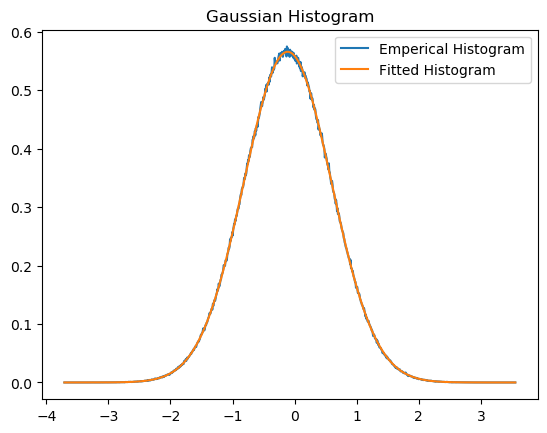

In [148]:
fig,ax = plt.subplots()

# compute and plot the histogram of samples
#hist, bin_edges = np.histogram(dataset, bins=500, density=True, weights=weight)
#bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

plt.plot(bin_centers, hist, label = 'Emperical Histogram')
  
# Get the fitted curve
hist_fit = fit_func(bin_centers, *coeff) 
plt.plot(bin_centers, hist_fit, label='Fitted Histogram')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print ('Fitted mean = ', coeff[0])
print ('Fitted covariance = ', coeff[1]**2)    

plt.title("Gaussian Histogram") 

plt.legend()

plt.show()

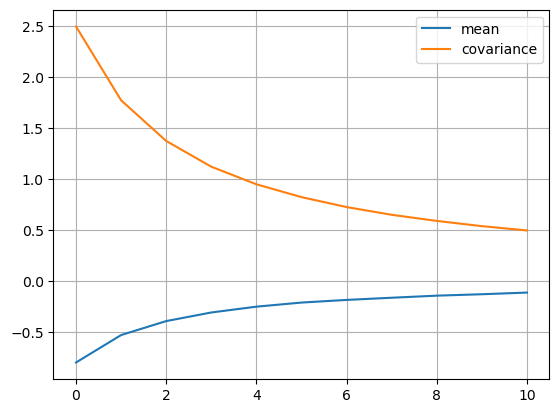

[-0.8        -0.53071651 -0.39350658 -0.30900022 -0.25179754 -0.21159085
 -0.18562319 -0.16418622 -0.14368936 -0.12978736 -0.11354618]
[2.5        1.7749817  1.3754316  1.12277933 0.9501182  0.82410732
 0.72635967 0.65047489 0.59040871 0.53901915 0.49680077]


In [149]:
plt.plot(mean_nu, label='mean')
cov_nu = (sigma_nu)**2
plt.plot(cov_nu, label='covariance')
plt.grid()
plt.legend()
plt.show()

print(mean_nu)
print(cov_nu)
